In [85]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

from sklearn import datasets
from sklearn import metrics

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB

In [86]:
# Load Cancer Data
breast_cancer = load_breast_cancer()
x = breast_cancer.data
y = breast_cancer.target

In [87]:
x = pd.DataFrame(x)
x.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [88]:
y = pd.DataFrame(y)
y.head()

,0
0,0
1,0
2,0
3,0
4,0


In [89]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

sc_x = StandardScaler()
x_train_sc = sc_x.fit_transform(X_train)
x_test_sc = sc_x.fit_transform(X_test)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 0)
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [90]:
# Train Naive-Bayes Model

naive_bayes = GaussianNB()
naive_bayes.fit(x_train,y_train)

C:\Users\Yousef Safi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

              precision    recall  f1-score   support

           0       0.88      0.89      0.88        47
           1       0.92      0.91      0.92        67

    accuracy                           0.90       114
   macro avg       0.90      0.90      0.90       114
weighted avg       0.90      0.90      0.90       114



Text(33.0, 0.5, 'actual label')

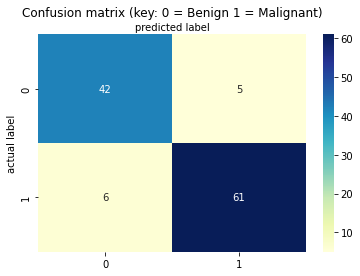

In [91]:
# Get Test Predictions
preds = naive_bayes.predict(x_test)

# Create Report
print(classification_report(y_test,preds))

# Confusion matrix
cm = confusion_matrix(y_test,preds)
fig,ax = plt.subplots()
sns.heatmap(pd.DataFrame(cm),annot=True,cmap="YlGnBu",fmt='g')
ax.xaxis.set_label_position('top')
plt.title('Confusion matrix (key: 0 = Benign 1 = Malignant)')
plt.xlabel('predicted label')
plt.ylabel('actual label')

In [92]:
#Problem 2
##################################################################

In [93]:
data=load_breast_cancer()
data.keys()
 
# Check the output classes
print(data['target_names'])
 
# Check the input attributes
print(data['feature_names'])

['malignant' 'benign']
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [94]:

# construct a dataframe using pandas
df1=pd.DataFrame(data['data'],columns=data['feature_names'])
 
# Scale data before applying PCA
scaling=StandardScaler()
 
# Use fit and transform method
scaling.fit(df1)
Scaled_data=scaling.transform(df1)
 
# Set the n_components=3
principal=PCA(n_components=3)
principal.fit(Scaled_data)
x=principal.transform(Scaled_data)
 
# Check the dimensions of data after PCA
print(x.shape)

(569, 3)


In [95]:
principal.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825723,  0.14188335,  0.27533947],
       [-0.00853124,  0.0645499 , -0.00931422,  0.02869952, -0.1042919 ,
        -0.07409156,  0.00273384, -0.02556354, -0

Text(0, 0.5, 'pc2')

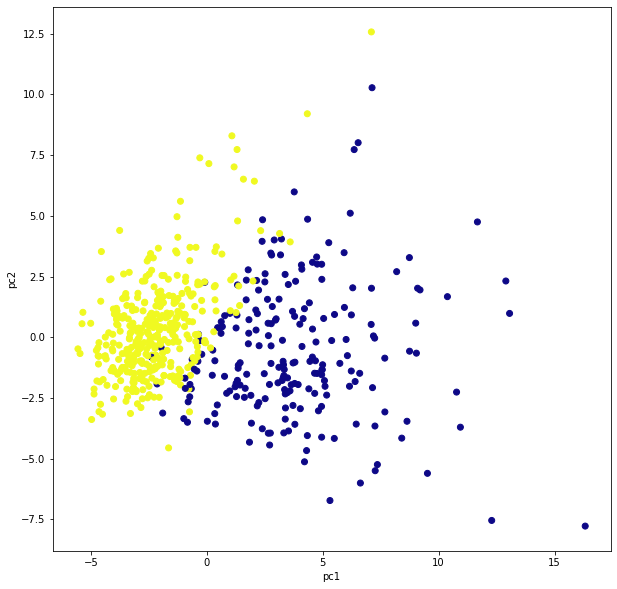

In [96]:
plt.figure(figsize=(10,10))
plt.scatter(x[:,0],x[:,1],c=data['target'],cmap='plasma')
plt.xlabel('pc1')
plt.ylabel('pc2')

In [97]:
# Use 80% and 20% split between training and evaluation

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 0)
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [104]:
model = LogisticRegression(solver = 'liblinear')
model.fit(x_train, Y_train)
predicted = model.predict(x_test)
matrix = confusion_matrix(Y_test, predicted)
report = classification_report(Y_test, predicted)
print("Confusion Matrix: \n",matrix)
print("\n")
print("Classification Report: \n",report)

Confusion Matrix: 
 [[43  4]
 [ 5 62]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.91      0.91        47
           1       0.94      0.93      0.93        67

    accuracy                           0.92       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



C:\Users\Yousef Safi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(33.0, 0.5, 'actual label')

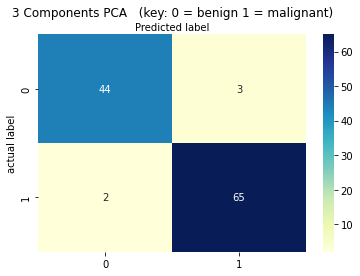

In [99]:
matrix = confusion_matrix(Y_test, predicted)
fig,ax = plt.subplots()
sns.heatmap(pd.DataFrame(matrix),annot = True, cmap = "YlGnBu", fmt = 'g')
ax.xaxis.set_label_position('top')
plt.title('3 Components PCA   (key: 0 = benign 1 = malignant)')
plt.xlabel('Predicted label')
plt.ylabel('actual label')

In [ ]:
#Problem 3
##################################################################

In [100]:
model = GaussianNB()
model.fit(X_train_sc, Y_train)
predicted = model.predict(X_test_sc)
print("Confusion Matrix: \n", metrics.confusion_matrix(Y_test, predicted))
print("\n")
print("Classification Report: \n", metrics.classification_report(Y_test, predicted))

Confusion Matrix: 
 [[43  4]
 [ 3 64]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.91      0.92        47
           1       0.94      0.96      0.95        67

    accuracy                           0.94       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



C:\Users\Yousef Safi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [101]:
naive_bayes = GaussianNB()
naive_bayes.fit(x_train,y_train)

C:\Users\Yousef Safi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

              precision    recall  f1-score   support

           0       0.93      0.91      0.92        47
           1       0.94      0.96      0.95        67

    accuracy                           0.94       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



Text(33.0, 0.5, 'actual label')

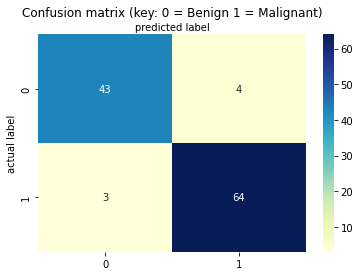

In [103]:
preds = model.predict(X_test_sc)

# Create Report
print(classification_report(y_test,preds))

# Confusion matrix
cm = confusion_matrix(y_test,preds)
fig,ax = plt.subplots()
sns.heatmap(pd.DataFrame(cm),annot=True,cmap="YlGnBu",fmt='g')
ax.xaxis.set_label_position('top')
plt.title('Confusion matrix (key: 0 = Benign 1 = Malignant)')
plt.xlabel('predicted label')
plt.ylabel('actual label')